In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

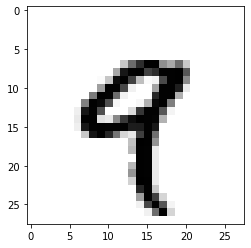

In [2]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [3]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [4]:
batch = train_images[:128]

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
import numpy as np
x = np.random.random((3, 2, 1, 3))
y = np.random.random((1, 3))
z = np.maximum(x,y)
z

array([[[[0.29201932, 0.70600803, 0.89280349]],

        [[0.2084167 , 0.40215563, 0.52817946]]],


       [[[0.71707593, 0.40215563, 0.64415067]],

        [[0.63021308, 0.40215563, 0.67085419]]],


       [[[0.55157814, 0.46952822, 0.35079527]],

        [[0.4345701 , 0.63078534, 0.73030483]]]])

In [7]:
x = np.array([[0, 1], [2, 3], [4, 5]])

x.shape

(3, 2)

In [8]:
x=x.reshape((6,1))
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [9]:
x=x.reshape((2,3))
x

array([[0, 1, 2],
       [3, 4, 5]])

In [10]:
x= np.transpose(x)
x

array([[0, 3],
       [1, 4],
       [2, 5]])

In [11]:
###영화리뷰분류
from keras.datasets import imdb
#리뷰, 부정or긍정 : 0 or 1
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Woody\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Woody\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
# word_index : 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 "i-3"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
#정수 시퀀스를 이진행렬로 인코딩
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from keras import models
from keras import layers

model = models.Sequential() # 모델 정의
# 층을 순차적으로 쌓음
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
# 옵티마이저의 매개변수를 바꿔야하는 경우
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# 자신만의 손실 함수, 측정 함수를 전달해야 할 경우
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# 512개의 샘플단위로 20번의 epoch동안 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 262ms/step - loss: 0.6219 - accuracy: 0.6936 - val_loss: 0.4352 - val_accuracy: 0.8539
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3680 - accuracy: 0.8886 - val_loss: 0.3312 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2587 - accuracy: 0.9199 - val_loss: 0.2939 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1993 - accuracy: 0.9347 - val_loss: 0.2714 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1537 - accuracy: 0.9515 - val_loss: 0.3144 - val_accuracy: 0.8747
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1261 - accuracy: 0.9597 - val_loss: 0.2942 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1056 - accuracy: 0.9688 - val_loss: 0.3081 - val_accuracy: 0.8855
Epoch 8/20
3

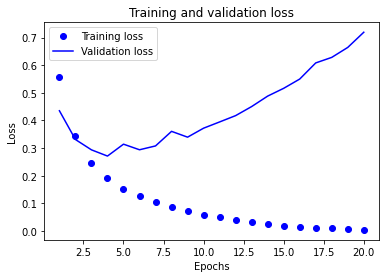

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# 훈련과 검증 손실 그래프
plt.show()

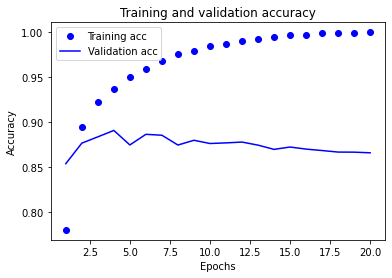

In [24]:
plt.clf()   # 그래프를 초기화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# 훈련과 검증 정확도 그래프
plt.show()

In [25]:
# 훈련손실은 에포크마다 감소
# 훈련정확도는 에포크마다 증가
# 검증손실은 에포크마다 증가
# 검증정확도는 에포크마다 감소
# --> 훈련데이터의 테스트는 잘 이루어지지만,
# 검증데이터의 테스트는 잘 이루어지지 않는것으로 보아 과대적합으로 인한 문제가 발생하고 있음을 알 수 있음
# solution : 네번째 에포크 이후에 훈련을 중지함으로 overfitting 방지

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#네번의 에포크동안만 훈련
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 19ms/step - loss: 0.5612 - accuracy: 0.7491
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2900 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2101 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2884 - accuracy: 0.8852


In [27]:
results

[0.288432776927948, 0.8852400183677673]

In [28]:
# 훈련된 모델로 새로운 데이터를 예측 : 긍정일 확률 예측
model.predict(x_test)

array([[0.16546932],
       [0.9991076 ],
       [0.9682119 ],
       ...,
       [0.10053784],
       [0.06313846],
       [0.6183568 ]], dtype=float32)